<a href="https://colab.research.google.com/github/AdityaNerpagar/TensorFlow_ML_basics/blob/main/ML_Basics_CV5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing and storing Dataset**

# **Step 1: Download Training Dataset**

In [1]:
#Installing dataset in zip form
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-06-04 09:04:05--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.65.80, 142.250.188.208, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.65.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   140MB/s    in 1.0s    

2022-06-04 09:04:06 (140 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



# Step 2: Download Validation Dataset

In [4]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-06-04 09:12:12--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.45.16, 172.217.1.208, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.45.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2022-06-04 09:12:12 (99.2 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



# Step 3: Unzipping Both Datasets

In [5]:
#Unzipping ZIP file

import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')


# Unzip the validation dataset
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')
zip_ref.close()

# Step 4: Define Directories

In [6]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

#creating list of horse images
train_horse_names = os.listdir(train_horse_dir)
print(f'training horse: {train_horse_names[:10]}')

#creating list of human images
train_human_names = os.listdir(train_human_dir)
print(f'training Humans: {train_human_names[:10]}')


# Directory with our training horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

#creating list of horse images
validation_horse_names = os.listdir(validation_horse_dir)
print(f'validation horse: {validation_horse_names[:10]}')

#creating list of human images
validation_human_names = os.listdir(validation_human_dir)
print(f'Validation Humans: {validation_human_names[:10]}')


training horse: ['horse34-8.png', 'horse22-7.png', 'horse22-5.png', 'horse09-4.png', 'horse45-2.png', 'horse09-2.png', 'horse49-2.png', 'horse27-8.png', 'horse03-8.png', 'horse13-4.png']
training Humans: ['human17-00.png', 'human17-26.png', 'human08-11.png', 'human17-07.png', 'human15-23.png', 'human06-04.png', 'human12-03.png', 'human16-19.png', 'human11-30.png', 'human08-24.png']
validation horse: ['horse5-275.png', 'horse2-314.png', 'horse3-198.png', 'horse6-544.png', 'horse3-099.png', 'horse2-201.png', 'horse6-345.png', 'horse5-192.png', 'horse6-064.png', 'horse5-400.png']
Validation Humans: ['valhuman03-21.png', 'valhuman04-03.png', 'valhuman02-12.png', 'valhuman02-10.png', 'valhuman05-03.png', 'valhuman04-20.png', 'valhuman02-03.png', 'valhuman04-17.png', 'valhuman04-14.png', 'valhuman05-20.png']


In [7]:
#Print number of images in every directory

print(f'Number of Training horses: {len(os.listdir(train_horse_dir))}')
print(f'Number of Training humans: {len(os.listdir(train_human_dir))}')
print(f'Number of Validation horses: {len(os.listdir(validation_horse_dir))}')
print(f'Number of Validation humans: {len(os.listdir(validation_human_dir))}')

Number of Training horses: 500
Number of Training humans: 527
Number of Validation horses: 128
Number of Validation humans: 128


# Displaying Random 8 random images of horses and humans

In [9]:
#Configuring Matplotlib Parameters

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

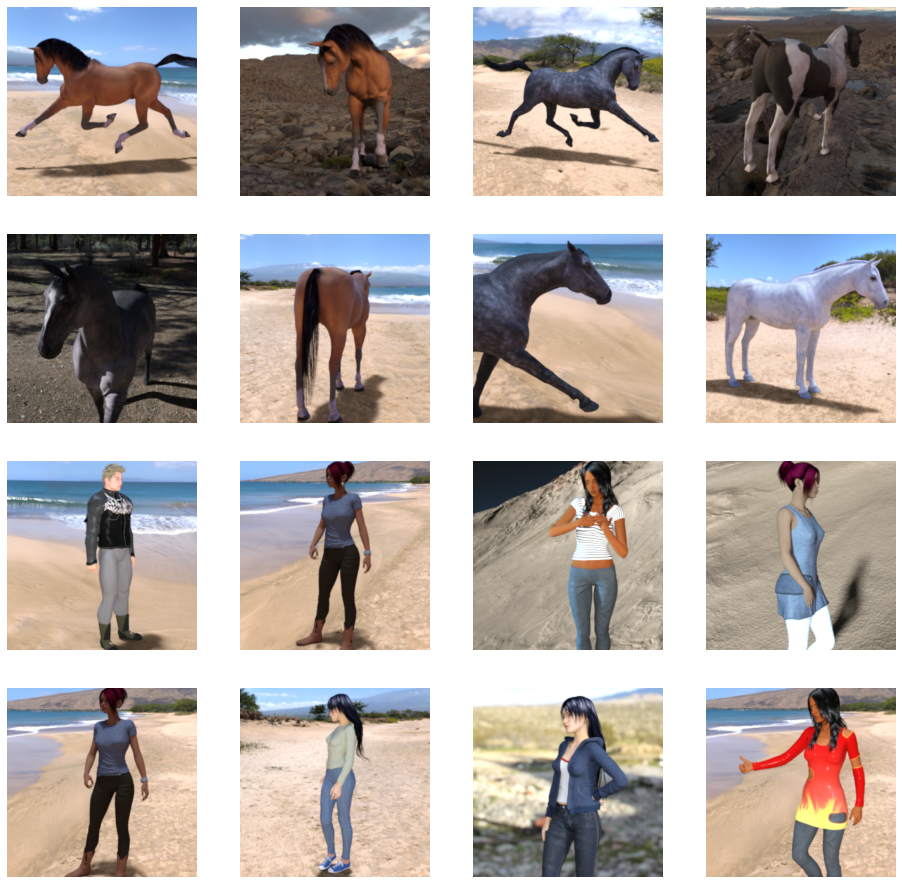

In [11]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


# Creating model from scratch

In [13]:
import tensorflow as tf


In [16]:
model1 = tf.keras.models.Sequential([
                                     # Note the input shape is the desired size of the image 300x300 with 3 bytes color
                                     #here we used multiple convolutions to reduce input to next level from 300x300
                                     #to around 35x35 or 17x17 or even less(more convolutions = less input to next level)
                                     #check input shape in summary
                                     # The first convolution
                                     tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Second convolution
                                     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Third convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Fourth convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # The Fifth convolution
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                     tf.keras.layers.MaxPooling2D(2,2),
                                     # Ususal Layers
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(512,activation='relu'),
                                     #Sigmoid function is more efficient in case of binary classification
                                     tf.keras.layers.Dense(1,activation='sigmoid') 
])

In [17]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 35, 35, 64)      

In [18]:
#train the model with the binary_crossentropy loss because it's a binary 
#classification problem, and the final activation is a sigmoid.
#use the rmsprop optimizer with a learning rate of 0.001
#In this case, using the RMSprop optimization algorithm is preferable to 
#stochastic gradient descent (SGD), because RMSprop automates learning-rate tuning 
#Other optimizers, such as Adam and Adagrad, also automatically adapt the 
#learning rate during training

from tensorflow.keras.optimizers import RMSprop

model1.compile(
    optimizer= RMSprop(learning_rate=0.001),#findout how to set learning rate
    loss= 'binary_crossentropy',
    metrics=['accuracy']
)

In [19]:
#data generators that will read pictures in the source folders,
#convert them to float32 tensors, and feed them (with their labels) to the model.
# one generator for the training images and one for the validation images. 
#These generators will yield batches of images of size 300x300 and their labels (binary).
#Then preprocess the images by normalizing the pixel values to be in the [0, 1] 
#range (originally all values are in the [0, 255] range). done using rescale 
#parameter of ImageDataGenerator class 
#This ImageDataGenerator class allows you to instantiate generators of 
#augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
    './horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary'
        )

validation_generator = validation_datagen.flow_from_directory(
    './validation-horse-or-human',
    target_size=(300,300),
    batch_size=32,
    class_mode='binary'
    )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [20]:
#training the model
history = model1.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    verbose = 1,
    validation_data = validation_generator,
    validation_steps =8
)

Epoch 1/15
8/8 [==============================] - 22s 905ms/step - loss: 0.7113 - accuracy: 0.5907 - val_loss: 0.5102 - val_accuracy: 0.8359
Epoch 2/15
8/8 [==============================] - 7s 911ms/step - loss: 0.4343 - accuracy: 0.8487 - val_loss: 0.7426 - val_accuracy: 0.8477
Epoch 3/15
8/8 [==============================] - 7s 913ms/step - loss: 0.3011 - accuracy: 0.8865 - val_loss: 0.9998 - val_accuracy: 0.8477
Epoch 4/15
8/8 [==============================] - 8s 933ms/step - loss: 0.2394 - accuracy: 0.9121 - val_loss: 1.0055 - val_accuracy: 0.8438
Epoch 5/15
8/8 [==============================] - 7s 898ms/step - loss: 0.3666 - accuracy: 0.8821 - val_loss: 0.4006 - val_accuracy: 0.8359
Epoch 6/15
8/8 [==============================] - 7s 897ms/step - loss: 0.2188 - accuracy: 0.9466 - val_loss: 0.9002 - val_accuracy: 0.8320
Epoch 7/15
8/8 [==============================] - 8s 979ms/step - loss: 0.1407 - accuracy: 0.9477 - val_loss: 1.3731 - val_accuracy: 0.8242
Epoch 8/15
8/8 [===

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

MessageError: ignored

# **Visualize intermediate Representations**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


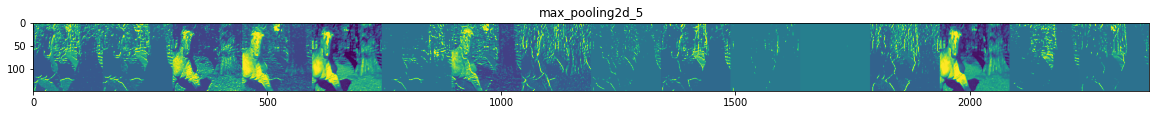

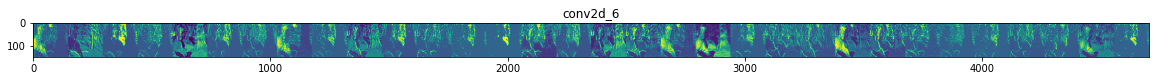

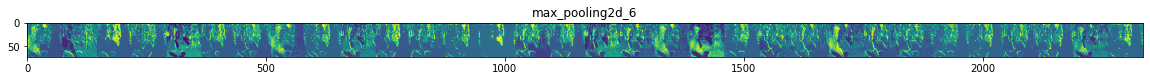

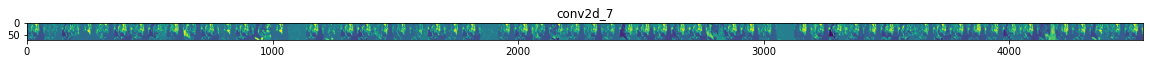

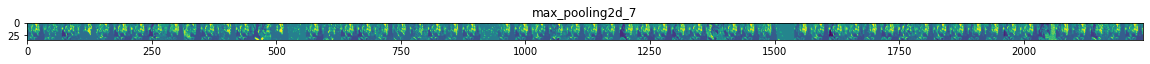

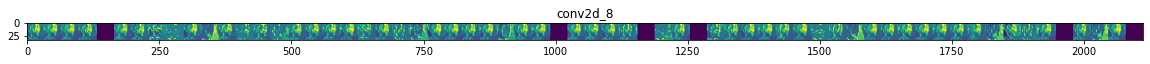

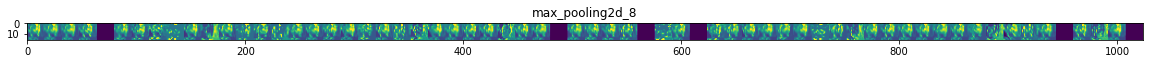

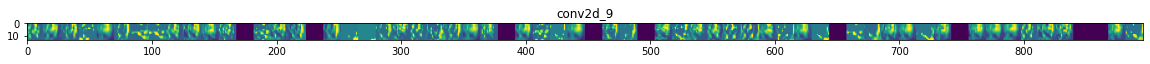

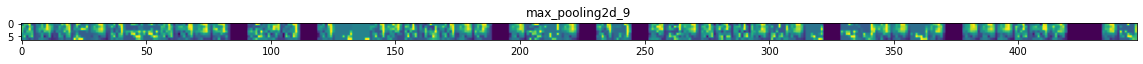

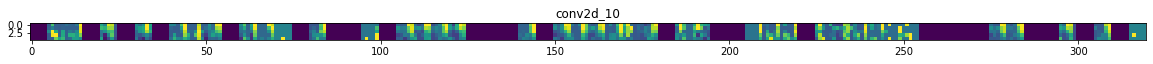

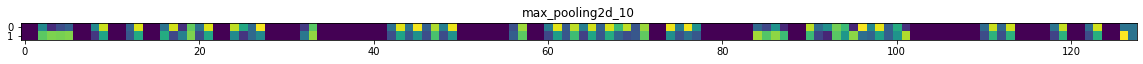

In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model1.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model1.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model1.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

You can see above how the pixels highlighted turn to increasingly abstract and compact representations, especially at the bottom grid.

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called representation sparsity and is a key feature of deep learning. These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline wherein each layer filters out the most useful features.

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)

# **Resources:**

1. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
2. https://wikipedia.org/wiki/Sigmoid_function
3. https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy
4. ML crash course: https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture
5. https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp
6. https://developers.google.com/machine-learning/glossary/#SGD
7. https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam
8. https://developers.google.com/machine-learning/glossary/#AdaGrad
9. https://colab.research.google.com/drive/1os_IKdEjhUdtVv01XWpJw312bracOkXZ#scrollTo=PEkKSpZlvJXA
10. Convolution in c/cpp: https://lodev.org/cgtutor/filtering.html